In [1]:
original_prica = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)

In [4]:
for i,p in enumerate(original_prica):
    price[i+1] = p

In [5]:
price[11]

35

## Get the max splitting by enumerate

In [6]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [7]:
def r(n):
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1,n)]
    )

In [8]:
r(10)

30

In [9]:
r(15)

45

In [13]:
import time

In [14]:
#@get_time
def fibonacci(n):
    if n  <= 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [15]:
start = time.time()
print(fibonacci(34))
end = time.time()
print(end-start)

5702887
1.9268090724945068


In [16]:
mem = defaultdict()
def fibonacci_op(n):
    if n in mem:
        return mem[n]
    else: 
        if n <= 2:
            mem[n] = 1
            return n
        else:
            result = fibonacci_op(n-1) + fibonacci_op(n-2)
            mem[n] = result
            return result

In [17]:
start = time.time()
print(fibonacci_op(64))
end = time.time()
print(end-start)

14662949395604
0.0


# Analysis: How to optimize

## A Simpler Problem

### Decorator

In [18]:
def get_time(func):
    def wrapper(*args):
        start = time.time()
        func(*args)
        end = time.time()
        print('used time : {}'.format(end-start))
    return wrapper

In [19]:
def f1(func):
    def wrapper(*args,**kwargs):
        print('Started')
        func(*args,**kwargs)
        print('Ended')
    return wrapper

In [20]:
def f():
    print('HELLO')

In [21]:
f = f1(f)

In [22]:
print(f.__name__)

wrapper


In [23]:
@f1
def g(a):
    print(a)

In [90]:
g('hello')

Started
hello
Ended


In [27]:
def k(*arg,**kwargs):
    print(arg,kwargs)

In [28]:
k(6,b=5)

(6,) {'b': 5}


In [29]:
from functools import wraps

In [31]:
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

# We use this method to solve Cut Rod probelm¶

In [32]:
solution = {}

In [33]:
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [34]:
r(20)

60

In [35]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35,
             15: 0,
             14: 0,
             13: 0,
             12: 0,
             20: 0,
             19: 0,
             18: 0,
             17: 0,
             16: 0})

In [36]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3)}

# How do we parse solution?¶

In [37]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [38]:
r(24)

75

In [39]:
parse_solution(20)

[11, 6, 3]

# Edit Distance

In [40]:
solution = {}

In [48]:
x=range(10)

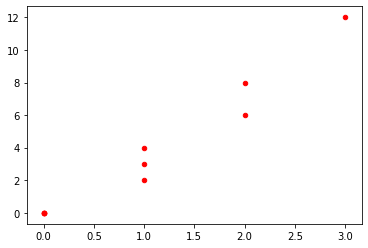

In [59]:
import matplotlib.pyplot as plt
import numpy as np 

for i in range(1, 5) :
    x = range(0, i)
    y = range(0, i) 
    y = np.array(y) * i
    #plt.cla()
    plt.scatter(x, y, c = 'r', s = 20)



In [57]:
y = range(1, 5) 
y = np.array(y) * 5

In [58]:
y

array([ 5, 10, 15, 20])

In [41]:
from functools import lru_cache

In [144]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  
        # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  
        # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [145]:
edit_distance('ABCDECG','ABCCEF')

3

In [60]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F',
 ('ABCDEC', 'A'): 'DEL C',
 ('ABCDEC', 'AB'): 'DEL C',
 ('ABCDEC', 'ABC'): 'DEL C',
 ('ABCDEC', 'ABCC'): '',
 ('ABCDEC', 'ABCCE'): 'DEL C',
 ('ABCDEC', 'ABCCEF'): 'SUB C => F',
 ('ABCDECG', 'A'): 'DEL G',
 ('ABCDECG', 'A

## Todo: Parse Solution is our homework

In [182]:
def f():
    string2=''
    return (len(string2), '-->ADD '+string2) if len(string2)!=0  else (0,'')

In [183]:
f()

(0, '')

In [185]:
@lru_cache(maxsize=2**10)
def find_path(string1, string2,method=""):
    
    if len(string1) == 0: return (len(string2), method+'-->ADD '+string2) if len(string2)!=0  else (0,method)
    if len(string2) == 0: return (len(string1), method+'-->DEL '+string1) if len(string1)!=0  else (0,method)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (find_path(string1[:-1], string2, method+' '+'DEL {}'.format(tail_s1))[0] + 1, find_path(string1[:-1], string2, method+' '+'DEL {}'.format(tail_s1))[1]),  
        # string 1 delete tail
        (find_path(string1, string2[:-1],method+' '+'ADD {}'.format(tail_s2))[0] + 1, find_path(string1, string2[:-1],method+' '+'ADD {}'.format(tail_s2))[1]),  
        # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (find_path(string1[:-1], string2[:-1],method+'')[0] + 0, find_path(string1[:-1], string2[:-1],method+'')[1])
    else:
        both_forward = (find_path(string1[:-1], string2[:-1],method+' '+ 'SUB {} => {}'.format(tail_s1, tail_s2))[0] + 1,find_path(string1[:-1], string2[:-1],method+' '+ 'SUB {} => {}'.format(tail_s1, tail_s2))[1])

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance,operation

In [186]:
find_path('ABCDECG','ABCCEF')
    

(3, ' DEL G SUB C => F SUB D => C')

# Problem Case 3: Pinyin Auto Correction Problem

In [61]:
chinese_dataset = 'article_9k.txt'

In [63]:
CHINESE_CHARATERS = open(chinese_dataset,encoding='utf-8').read()

In [65]:
CHINESE_CHARATERS[:40]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体'

In [67]:
!pip install pinyin

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
  Created wheel for pinyin: filename=pinyin-0.4.0-py3-none-any.whl size=3630488 sha256=7c2289f30183bf128da5b33c15bf713ce0f470aab813caee8f1dd729505cd568
  Stored in directory: c:\users\tb\appdata\local\pip\cache\wheels\0a\57\a2\340d2b5ecd26128889b531929ae1089f8424f1f6fa754e2bd3
Successfully built pinyin


In [68]:
import pinyin

In [70]:
pinyin.get('你好，佟博',format='strip',delimiter=' ')

'ni hao ， tong bo'

In [71]:
def chinese_to_pinyin(character):
    return pinyin.get(character, format='strip', delimiter=' ')

In [72]:
CHINESE_CHARATERS_COPYS = chinese_to_pinyin(CHINESE_CHARATERS)

In [74]:
CHINESE_CHARATERS_COPYS[:40]

'ci wai zi ben zhou 6 yue 1 2 ri qi chu x'

In [75]:
len(CHINESE_CHARATERS_COPYS)

129433034

In [76]:
import re

In [77]:
def tokens(text):
    "List all the pinyin characters"
    return re.findall('[a-z]+',text.lower())

In [78]:
CHINESE_CHARATERS_COPYS[:100]

'ci wai zi ben zhou 6 yue 1 2 ri qi chu xiao mi shou ji 6 deng 1 5 kuan ji xing wai qi yu ji xing yi '

In [189]:
Token=tokens(CHINESE_CHARATERS_COPYS)

In [190]:
Token[:10]

['ci', 'wai', 'zi', 'ben', 'zhou', 'yue', 'ri', 'qi', 'chu', 'xiao']

In [80]:
from collections import Counter, defaultdict

In [81]:
PINYIN_COUNT = Counter(tokens(CHINESE_CHARATERS_COPYS))

In [95]:
PINYIN_COUNT.get('tu')

58771

In [130]:
def correct(word):
    'Find the most possible pinyin based on edit distance'
    # Prefer edit distance 0, then 1, then 2; otherwist default to word itself
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    #print("len(edits0) ",len(edits0(word)))
    #print("len(edits1) ",len(edits1(word)))
    #print("len(edits2) ",len(edits2(word)))
    #print(candidates)
    #print(candidates)
    return max(candidates,key=PINYIN_COUNT.get)

In [101]:
type({i for i in range(10)})

set

In [102]:
def known(words):
    'Return the pinyin in our data'
    return {w for w in words if w in PINYIN_COUNT}

def edits0(word):
    'Return all strings that are zero edits away from word (i.e., just word itself).'
    return {word}

def edits2(word):
    'Return all strings that are two edits away from this pinyin.'
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)} #这个代码是否能保证编辑距离恰好为1？无法保证

In [103]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def splits(word):
    'Return a list of all possible (first, rest) pairs that comprise pinyin.'
    return [(word[:i], word[i:])
           for i in range(len(word)+1)]

def edits1(word):
    'Return all strings that are one edit away from this pinyin.'
    pairs = splits(word)
    deletes = [a+b[1:] for (a,b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a,b) in pairs if len(b) > 1]
    replaces = [a+c+b[1:] for (a,b) in pairs for c in alphabet if b]
    inserts = [a+c+b for (a,b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

In [112]:
#known(edits1('tong'))

In [113]:
#known(edits2('tong'))

In [46]:
splits('pinyin')

[('', 'pinyin'),
 ('p', 'inyin'),
 ('pi', 'nyin'),
 ('pin', 'yin'),
 ('piny', 'in'),
 ('pinyi', 'n'),
 ('pinyin', '')]

In [48]:
print(edits0('pinyin'))

{'pinyin'}


In [115]:
print(edits1('pinyin'))

{'pinyen', 'pinyein', 'pinyian', 'pinywin', 'piyin', 'ppnyin', 'picyin', 'pidyin', 'pinayin', 'pinyibn', 'pinyinv', 'pinqin', 'pinyjn', 'pinuin', 'pinmin', 'pizyin', 'piinyin', 'puinyin', 'pinyink', 'pinyqin', 'pinyid', 'pincyin', 'ptnyin', 'pinhyin', 'ypinyin', 'pinyfn', 'pinxyin', 'piynin', 'pihnyin', 'pinryin', 'pinyxn', 'lpinyin', 'pwnyin', 'binyin', 'pineyin', 'psinyin', 'xpinyin', 'pinybin', 'pinyit', 'pinyimn', 'piniin', 'pinyic', 'pfnyin', 'iinyin', 'pjnyin', 'piniyin', 'pznyin', 'winyin', 'pinzin', 'pmnyin', 'pinykin', 'pinpyin', 'pinfyin', 'pinbyin', 'pinyip', 'pinyivn', 'pinyjin', 'pieyin', 'pinyinx', 'pinyixn', 'pijyin', 'pginyin', 'panyin', 'picnyin', 'pinyiln', 'punyin', 'tpinyin', 'pinsyin', 'pminyin', 'pbnyin', 'pinyipn', 'pinzyin', 'jinyin', 'pigyin', 'oinyin', 'pilyin', 'pincin', 'pinygin', 'piayin', 'pninyin', 'pinpin', 'pinyii', 'pinhin', 'pingin', 'pyinyin', 'pingyin', 'pinyif', 'piiyin', 'pinyion', 'cpinyin', 'pqinyin', 'pinyir', 'pinyinr', 'pinyij', 'pinyib', 'pi

# Test

In [127]:
known(edits0('yinc'))

set()

In [122]:
known(edits1('yin'))

{'bin',
 'jin',
 'lin',
 'min',
 'nin',
 'pin',
 'qin',
 'xin',
 'yan',
 'yi',
 'yin',
 'ying',
 'yun'}

In [119]:
correct('yin')

len(edits0)  1
len(edits1)  182
len(edits2)  14352
{'yin'}
{'yin'}


'yin'

In [120]:
correct('yign')

len(edits0)  1
len(edits1)  234
len(edits2)  24254
{'yin', 'ying'}
{'yin', 'ying'}


'ying'

In [121]:
correct('yinn')

len(edits0)  1
len(edits1)  232
len(edits2)  23353
{'yin', 'ying'}
{'yin', 'ying'}


'ying'

In [128]:
def correct_sequence_pinyin(text_pinyin):
    return ' '.join(map(correct, text_pinyin.split()))

In [135]:
correct_sequence_pinyin('zhe sih yi shou jian dan de xioa qning ge')

'zhe shi yi shou jian dan de xiao qing ge'

In [57]:
correct_sequence_pinyin('wo xiang shagn qinng hua da xue')

'wo xiang shang qing hua da xue'

# 思考题-homework？    
#### 如何在不带空格的时候完成自动修整？--> 如何完成拼音的自动分割？   
###### 提示：使用第一节课提到的语言模型!

woyaoshangqinghua
w yaoshangqinghua
wo yaoshangqinghua
woyao shangqinghua

-> DP

In [191]:
Token_2=  [''.join(Token[i:i+2]) for i in range(len(Token[:-2]))]
#PINYIN_COUNT = Counter(tokens(CHINESE_CHARATERS_COPYS))

In [192]:
words_count_2 = Counter(Token_2)
words_count_2.most_common(10)

[('yueri', 165274),
 ('xinhua', 151823),
 ('huashe', 145795),
 ('nn', 136525),
 ('nxin', 89783),
 ('zhongguo', 87864),
 ('waidai', 83330),
 ('nianyue', 77695),
 ('jizhe', 65213),
 ('nwai', 62999)]

In [193]:
words_count_2.most_common(10)

[('yueri', 165274),
 ('xinhua', 151823),
 ('huashe', 145795),
 ('nn', 136525),
 ('nxin', 89783),
 ('zhongguo', 87864),
 ('waidai', 83330),
 ('nianyue', 77695),
 ('jizhe', 65213),
 ('nwai', 62999)]

In [194]:
def prob_2(word1,word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2]/len(Token_2)
    else: return 1 /len(Token_2)

In [ ]:
def prob_3(word1,word2,word3):
    if word1+word2+word3 in words_count_3: return words_count_3[word1+word2+word3] / len(TOKEN_3_GRAM)
    else: return 1 / len(TOKEN_3_GRAM)

In [ ]:
def prob_1(word):
    if word in PINYIN_COUNT:
        return PINYIN_COUNT[word] / len(Token)
    else:
        return 1/len(Token)

In [ ]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_porb =1
    for i ,word in enumerate(words[:-2]):
        next_1 = words[i+1]
        next_2 =words[i+2]
        pro = prob_3(word,next_1,next_2)
        sentence_porb*=pro
    sentence_porb*=prob_2(words[-2],words[-1])
    return sentence_porb

In [195]:
def splits(word):
    'Return a list of all possible (first, rest) pairs that comprise pinyin.'
    return [(word[:i], word[i:])
           for i in range(len(word)+1) if word[:i] in PINYIN_COUNT]

In [209]:
def  split_sentence(sentence):
    if sentence=="":
        return ""
    lst = splits(sentence)
    tp=max(lst,key=lambda x:PINYIN_COUNT[x[0]] if x[0] in PINYIN_COUNT else 0 )
    sp=tp[0]
    if tp[1]!="":
        sp+=" "+split_sentence(tp[1])
    return sp

In [208]:
split_sentence("woxiangshagnqinnghuadaxue")

'wo xian g sha g n qi n n g hua da xue'

In [204]:
PINYIN_COUNT['tong']

166443

In [ ]:
@lru_cache(maxsize=2**10)
def get_split_sentence(sentence):
    seq=[]
    for i in range(len(sentence)):
        sentence1 = sentence[:i]
        sentence2 = sentence[i:]
        get_probablity(sentence1)
        seq.append((sentence1,sentence2))

In [210]:
correct_sequence_pinyin(split_sentence("woxiangshagnqinnghuadaxue"))

'wo xian g sha g n qi n n g hua da xue'